In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

In [2]:
# Please ignore this code; it will be used to demonstrate an idea later.
def r_scatter(r):
    plots.figure(figsize=(5,5))
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plots.scatter(x, y, color='darkblue', s=20)
    plots.xlim(-4, 4)
    plots.ylim(-4, 4)

# Lecture 23 #

## Guessing the Future

In [3]:
# Load in the original dataset & calculate parent height averages
# Note: Child heights are the **adult** heights of children in a family
families = Table.read_table('family_heights.csv')
parent_avgs = (families.column('father') + families.column('mother')) / 2

heights = Table().with_columns(
    'Parent Average', parent_avgs,
    'Child', families.column('child'),
)
heights

Parent Average | Child
72.75          | 73.2
72.75          | 69.2
72.75          | 69
72.75          | 69
71             | 73.5
71             | 72.5
71             | 65.5
71             | 65.5
69.5           | 71
69.5           | 68
... (924 rows omitted)

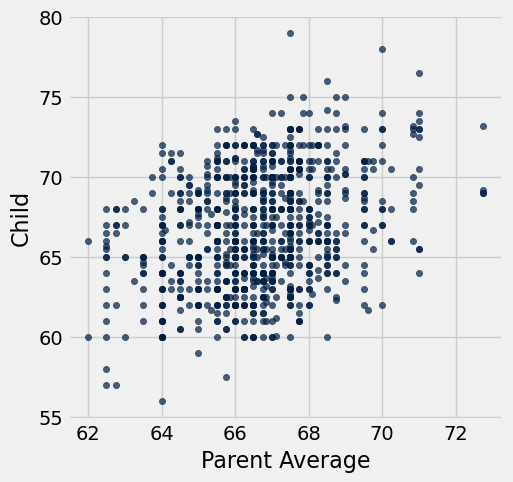

In [4]:
# Visualize the relationship between the average parent height & the child's height
heights.scatter('Parent Average', 'Child')

In [5]:
# Find the points where the parent average is 0.5 inches away
nearby = heights.where('Parent Average', are.between(67.5, 68.5))
nearby_mean = np.average(nearby.column('Child'))
nearby_mean

67.62

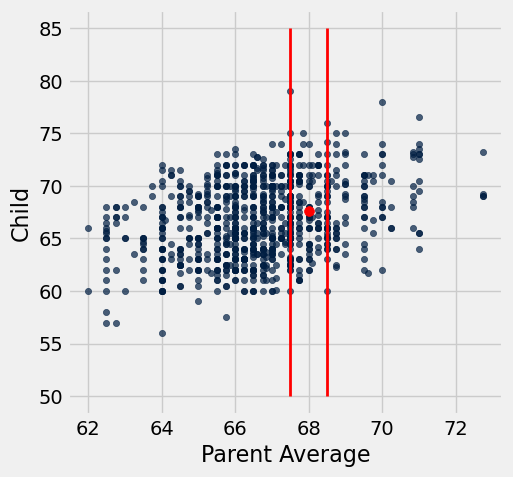

In [6]:
# Visualize what we looked at in the previous cell
heights.scatter('Parent Average', 'Child')

# Ignore the code below
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [7]:
# A function that returns a predicted adult height for the child of a family
def predict_child(h):
    """Predict the height of a child whose parents have a parent average height of p_avg.
    
    The prediction is the average height of the children whose parent average height is
    in the range p_avg plus or minus 0.5.
    """
    nearby = heights.where('Parent Average', are.between(h - 1/2, h + 1/2))
    return np.average(nearby.column('Child'))

In [8]:
# Make predictions for the height of every child in the table
heights_with_predictions = heights.with_columns(
    'Prediction', heights.apply(predict_child, 'Parent Average'))

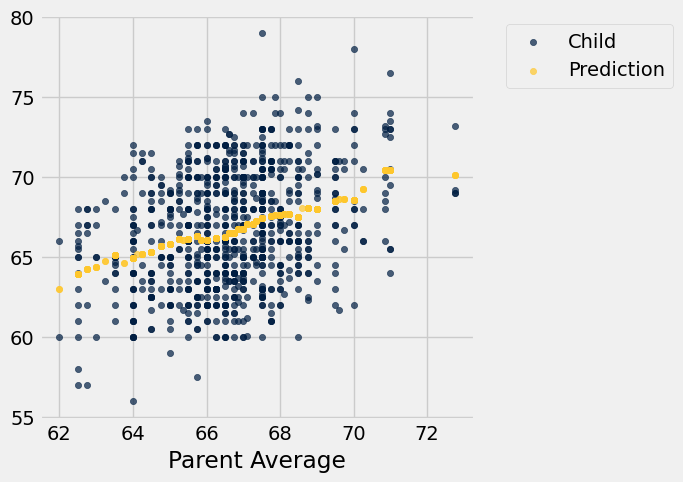

In [9]:
# Visualize the predictions made in the previous cell
heights_with_predictions.scatter('Parent Average')

## Association

In [12]:
# Load in the original dataset
hybrid = Table.read_table('hybrid.csv')
hybrid

vehicle         | year | msrp    | acceleration | mpg   | class
Prius (1st Gen) | 1997 | 24509.7 | 7.46         | 41.26 | Compact
Tino            | 2000 | 35355   | 8.2          | 54.1  | Compact
Prius (2nd Gen) | 2000 | 26832.2 | 7.97         | 45.23 | Compact
Insight         | 2000 | 18936.4 | 9.52         | 53    | Two Seater
Civic (1st Gen) | 2001 | 25833.4 | 7.04         | 47.04 | Compact
Insight         | 2001 | 19036.7 | 9.52         | 53    | Two Seater
Insight         | 2002 | 19137   | 9.71         | 53    | Two Seater
Alphard         | 2003 | 38084.8 | 8.33         | 40.46 | Minivan
Insight         | 2003 | 19137   | 9.52         | 53    | Two Seater
Civic           | 2003 | 14071.9 | 8.62         | 41    | Compact
... (143 rows omitted)

In [13]:
# Look at the highest msrp (manufacturer's suggested retail price) values
hybrid.sort('msrp', descending=True)

vehicle         | year | msrp    | acceleration | mpg   | class
Lexus LS600h/hL | 2007 | 118544  | 17.54        | 21    | Midsize
ActiveHybrid 7  | 2010 | 104300  | 20.41        | 22.11 | Large
ActiveHybrid 7i | 2011 | 102606  | 18.18        | 20    | Midsize
ActiveHybrid X6 | 2009 | 97237.9 | 17.96        | 18.82 | SUV
S400 Long       | 2009 | 96208.9 | 13.89        | 26.34 | Large
Panamera S      | 2013 | 96150   | 18.52        | 25    | Large
Panamera S      | 2012 | 95283.9 | 17.54        | 25    | Large
S400            | 2013 | 92350   | 13.89        | 21    | Large
S400            | 2010 | 88212.8 | 12.99        | 21    | Large
ActiveHybrid 7L | 2013 | 84300   | 18.18        | 25    | Large
... (143 rows omitted)

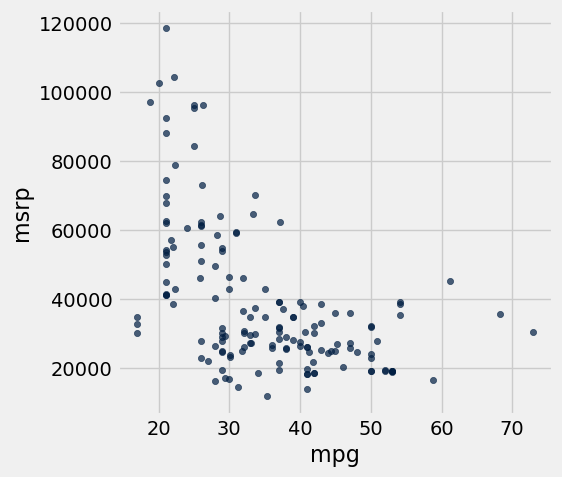

In [14]:
# Visualize the relationship between mpg & msrp
hybrid.scatter('mpg', 'msrp')

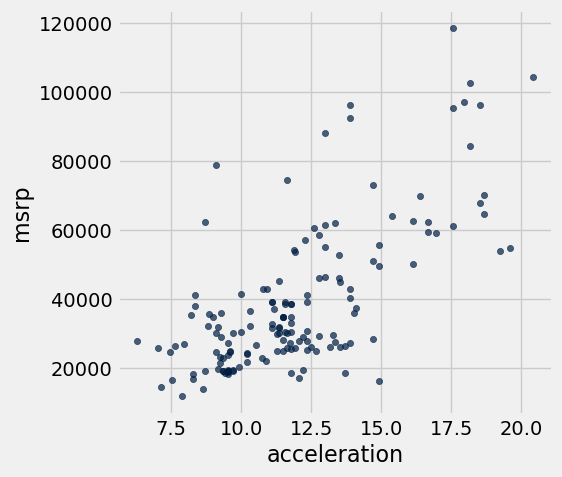

In [15]:
# Visualize the relationship between acceleration & msrp
hybrid.scatter('acceleration', 'msrp')

In [16]:
# Filter the table to only include SUVs
suv = hybrid.where('class', 'SUV')
suv.num_rows

39

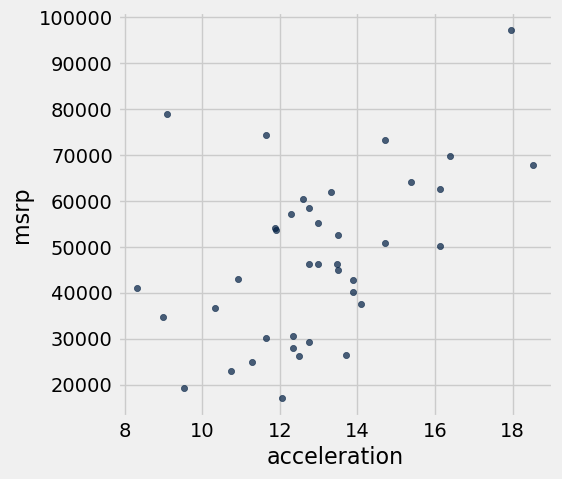

In [17]:
# Visualize the relationship between acceleration & msrp for SUVs
suv.scatter('acceleration', 'msrp')

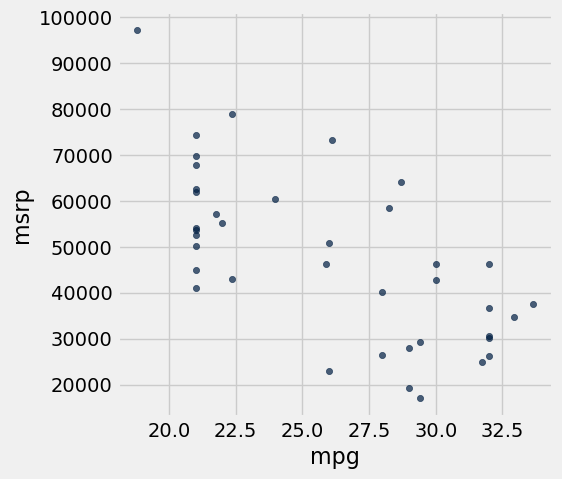

In [18]:
# Visualize the relationship between mpg & msrp for SUVs
suv.scatter('mpg', 'msrp')

In [19]:
# A function that converts an array of numbers to standard units
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.mean(x)) / np.std(x)

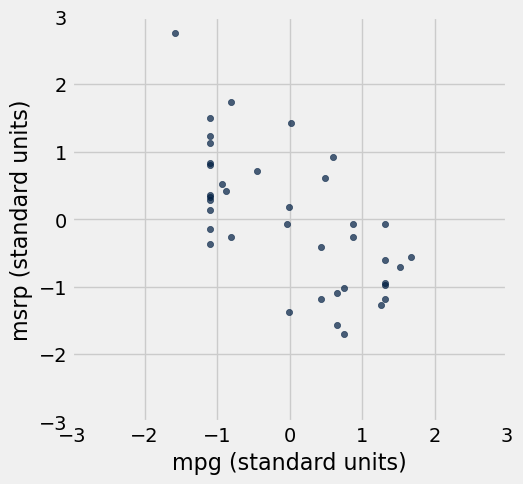

In [20]:
# Visualize the relationship between mpg & msrp for SUVs in SU
Table().with_columns(
    'mpg (standard units)',  standard_units(suv.column('mpg')), 
    'msrp (standard units)', standard_units(suv.column('msrp'))
).scatter(0, 1)

# Ignore the code below
plots.xlim(-3, 3)
plots.ylim(-3, 3);

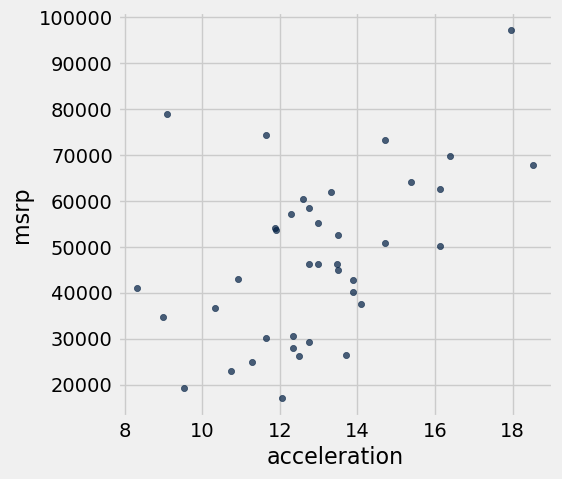

In [22]:
# Visualize the relationship between acceleration & msrp for SUVs
suv.scatter('acceleration', 'msrp')

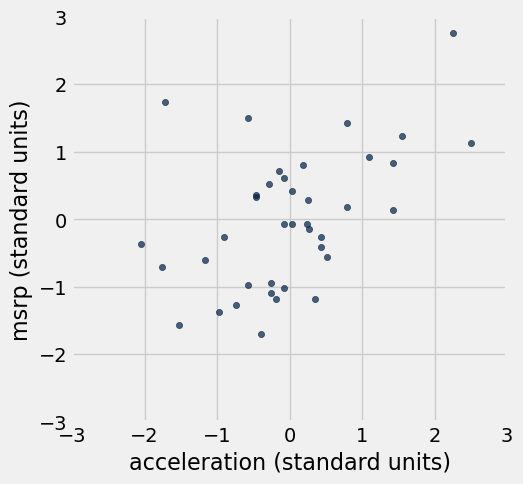

In [23]:
# Visualize the relationship between acceleration & msrp for SUVs in SU
Table().with_columns(
    'acceleration (standard units)', standard_units(suv.column('acceleration')), 
    'msrp (standard units)',         standard_units(suv.column('msrp'))
).scatter(0, 1)

# Ignore the code below
plots.xlim(-3, 3)
plots.ylim(-3, 3);

## Correlation

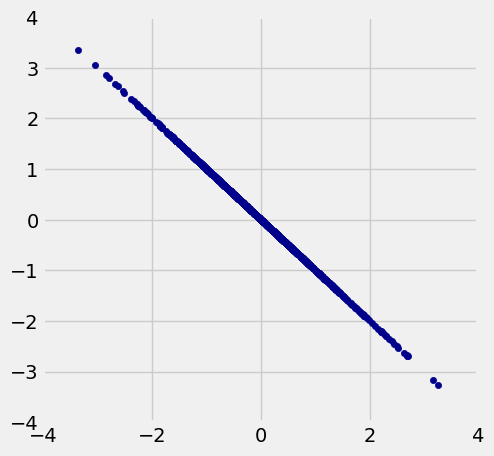

In [24]:
# Visualize different correlations
r_scatter(-1)

In [25]:
# A "toy" dataset
x = np.arange(1, 7, 1)
y = make_array(2, 3, 1, 5, 2, 7)
t = Table().with_columns(
        'x', x,
        'y', y
    )
t

x    | y
1    | 2
2    | 3
3    | 1
4    | 5
5    | 2
6    | 7

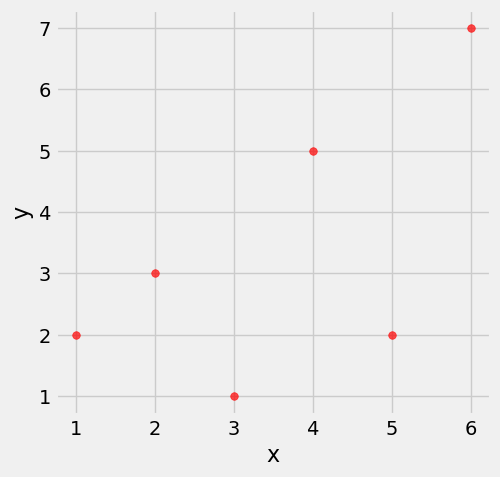

In [26]:
# Visualize the toy dataset
t.scatter('x', 'y', s=30, color='red')

In [27]:
# Convert the toy dataset to standard units
t = t.with_columns(
        'x (standard units)', standard_units(x),
        'y (standard units)', standard_units(y)
    )
t

x    | y    | x (standard units) | y (standard units)
1    | 2    | -1.46385           | -0.648886
2    | 3    | -0.87831           | -0.162221
3    | 1    | -0.29277           | -1.13555
4    | 5    | 0.29277            | 0.811107
5    | 2    | 0.87831            | -0.648886
6    | 7    | 1.46385            | 1.78444

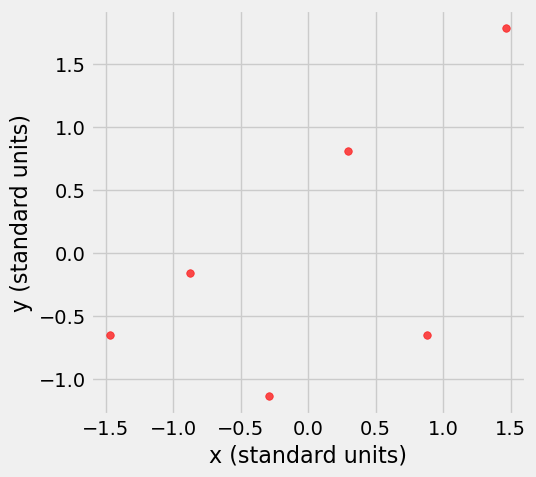

In [28]:
# Visualize the toy dataset in SU
t.scatter(2, 3, s=30, color='red')

In [29]:
# Take the product of the x & y columns in SU
t = t.with_columns(
    'product of standard units', t.column(2) * t.column(3))
t

x    | y    | x (standard units) | y (standard units) | product of standard units
1    | 2    | -1.46385           | -0.648886          | 0.949871
2    | 3    | -0.87831           | -0.162221          | 0.142481
3    | 1    | -0.29277           | -1.13555           | 0.332455
4    | 5    | 0.29277            | 0.811107           | 0.237468
5    | 2    | 0.87831            | -0.648886          | -0.569923
6    | 7    | 1.46385            | 1.78444            | 2.61215

In [30]:
# r is the average of the products of the x & y values in SU
r = np.average(t.column(2) * t.column(3))
r

0.6174163971897709

In [31]:
# A function that calculates correlation
def correlation(t, x, y):
    """t is a table; x and y are column labels"""
    x_in_standard_units = standard_units(t.column(x))
    y_in_standard_units = standard_units(t.column(y))
    return np.average(x_in_standard_units * y_in_standard_units)

In [32]:
correlation(t, 'x', 'y')

0.6174163971897709

### A look back at the SUV table ###

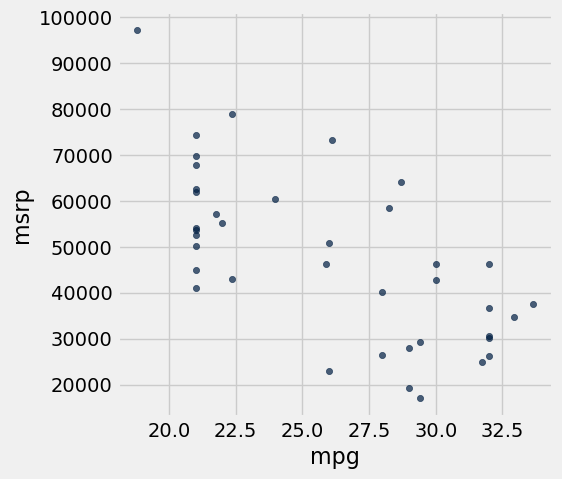

In [33]:
suv.scatter('mpg', 'msrp')

In [34]:
correlation(suv, 'mpg', 'msrp')

-0.6667143635709919

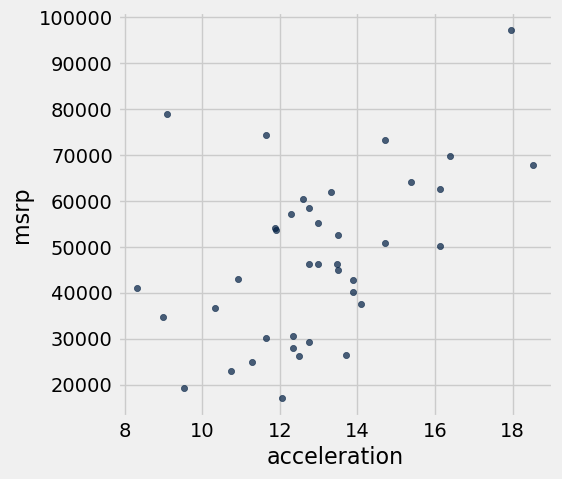

In [35]:
suv.scatter('acceleration', 'msrp')

In [36]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

### Switching Axes

In [37]:
correlation(t, 'x', 'y')

0.6174163971897709

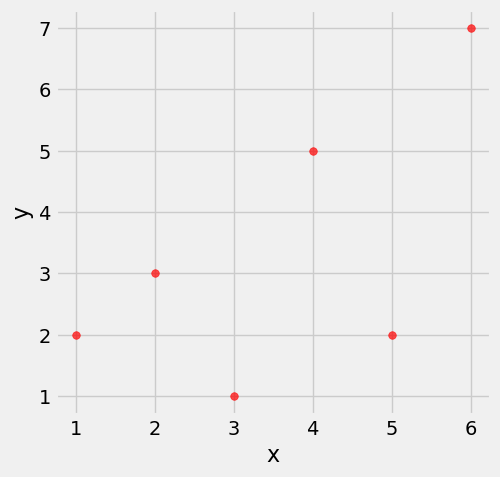

In [38]:
t.scatter('x', 'y', s=30, color='red')

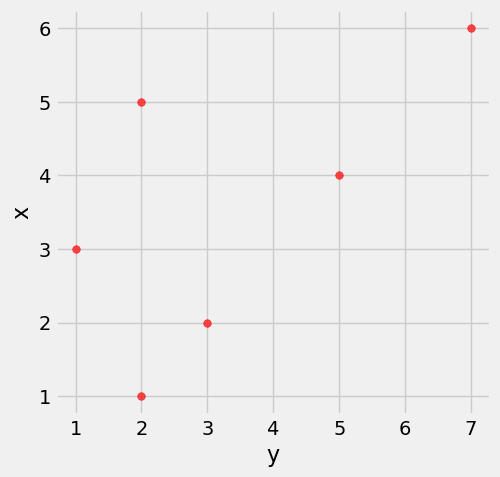

In [39]:
t.scatter('y', 'x', s=30, color='red')

In [40]:
correlation(t, 'y', 'x')

0.6174163971897709

### Nonlinearity

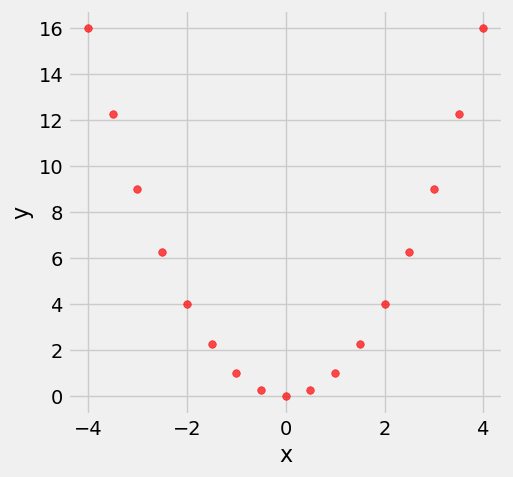

In [41]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear.scatter('x', 'y', s=30, color='r')

In [42]:
correlation(nonlinear, 'x', 'y')

0.0

### Outliers

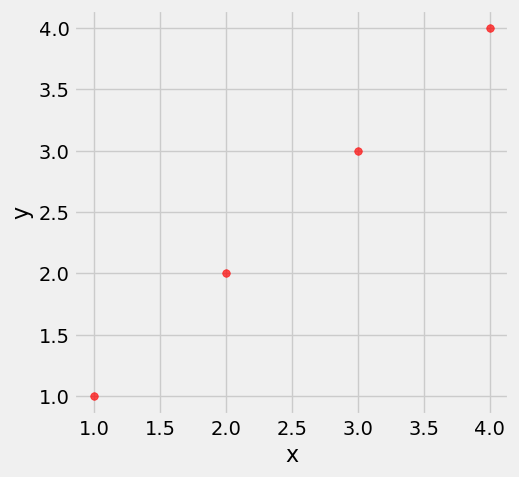

In [43]:
line = Table().with_columns(
        'x', make_array(1, 2, 3, 4),
        'y', make_array(1, 2, 3, 4)
    )
line.scatter('x', 'y', s=30, color='r')

In [44]:
correlation(line, 'x', 'y')

1.0

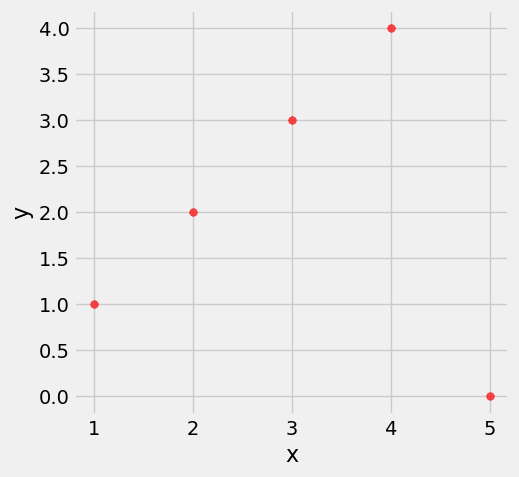

In [45]:
outlier = Table().with_columns(
        'x', make_array(1, 2, 3, 4, 5),
        'y', make_array(1, 2, 3, 4, 0)
    )
outlier.scatter('x', 'y', s=30, color='r')

In [46]:
correlation(outlier, 'x', 'y')

0.0

### Ecological Correlations

In [47]:
sat2014 = Table.read_table('sat2014.csv').sort('State')
sat2014

State                | Participation Rate | Critical Reading | Math | Writing | Combined
Alabama              | 6.7                | 547              | 538  | 532     | 1617
Alaska               | 54.2               | 507              | 503  | 475     | 1485
Arizona              | 36.4               | 522              | 525  | 500     | 1547
Arkansas             | 4.2                | 573              | 571  | 554     | 1698
California           | 60.3               | 498              | 510  | 496     | 1504
Colorado             | 14.3               | 582              | 586  | 567     | 1735
Connecticut          | 88.4               | 507              | 510  | 508     | 1525
Delaware             | 100                | 456              | 459  | 444     | 1359
District of Columbia | 100                | 440              | 438  | 431     | 1309
Florida              | 72.2               | 491              | 485  | 472     | 1448
... (41 rows omitted)

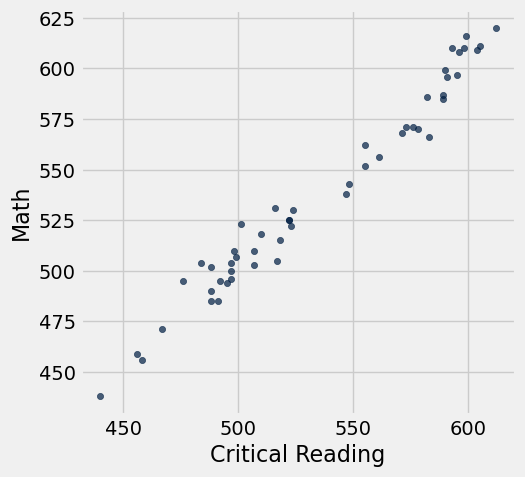

In [48]:
sat2014.scatter('Critical Reading', 'Math')

In [49]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067434

In [50]:
def rate_code(x):
    if x <= 25:
        return 'low'
    elif x <= 50:
        return 'low-moderate'
    elif x <= 75:
        return 'moderate_high'
    else:
        return 'high'

In [51]:
rate_codes = sat2014.apply(rate_code, 'Participation Rate')

In [52]:
sat2014 = sat2014.with_columns('Rate Code', rate_codes)
sat2014

State                | Participation Rate | Critical Reading | Math | Writing | Combined | Rate Code
Alabama              | 6.7                | 547              | 538  | 532     | 1617     | low
Alaska               | 54.2               | 507              | 503  | 475     | 1485     | moderate_high
Arizona              | 36.4               | 522              | 525  | 500     | 1547     | low-moderate
Arkansas             | 4.2                | 573              | 571  | 554     | 1698     | low
California           | 60.3               | 498              | 510  | 496     | 1504     | moderate_high
Colorado             | 14.3               | 582              | 586  | 567     | 1735     | low
Connecticut          | 88.4               | 507              | 510  | 508     | 1525     | high
Delaware             | 100                | 456              | 459  | 444     | 1359     | high
District of Columbia | 100                | 440              | 438  | 431     | 1309     | high
Florida              | 72.2               | 491              | 485  | 472     | 1448     | moderate_high
... (41 rows omitted)

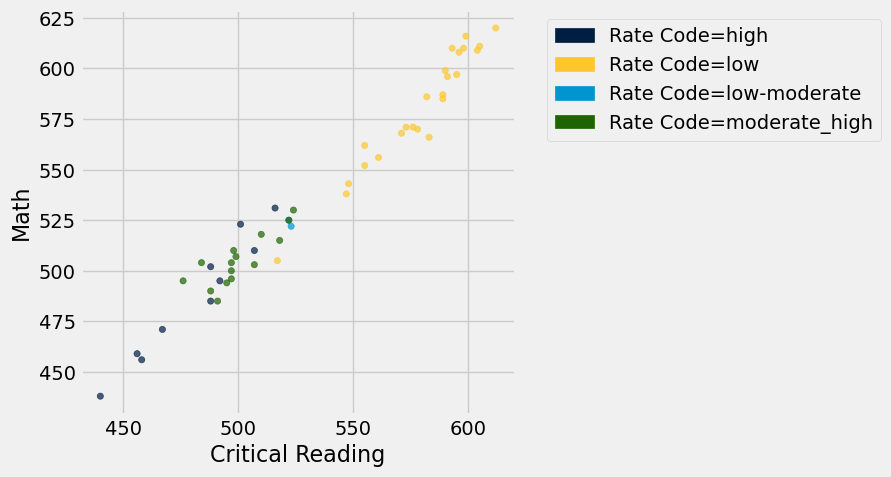

In [53]:
sat2014.scatter('Critical Reading', 'Math', group='Rate Code')

In [54]:
sat2014.where('Rate Code', 'low').show()

In [55]:
sat2014.where('Rate Code', 'high').show()